# PromoDates Notebook
The objective of this notebook is to explore the dates related to the promotion features. Thus, we'll try to deanonimate our dataset by establishing (or trying to establish) a correlation between our promotion dates and the amount of sales.

## Loading our data and libraries...

In [1]:
import numpy as np
import pandas as pd
from utils import read_data, process_time, merge_data, promo_detector
import seaborn as sns
import matplotlib.pyplot as plt
import sys
plt.rcParams['figure.figsize'] = (30, 8.0) # set default size of plots
sys.path.append("../../main/datasets/")

In [2]:
!ls  ../../main/datasets/

1.0v.zip


In [3]:
infos, items, orders = read_data("../../main/datasets/")
print("Sanity checks...", infos.shape, items.shape, orders.shape)

Sanity checks... (10463, 3) (10463, 8) (2181955, 5)


In [4]:
orders.head()

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19


## Preprocessing our orders

These cells were taken from Bruno's "1.1-First Model" Notebook, that can be found in this repository.

In [5]:
process_time(orders)

In [6]:
orders = promo_detector(orders)

In [7]:
orders

,time,transactID,itemID,order,salesPrice,days,days_backwards,group_backwards,salesPriceMode,promotion
0,2018-01-01 00:01:56,2278968,450,1,17.42,1,180,13,17.42,0
1,2018-01-01 00:09:24,2278968,450,1,17.42,1,180,13,17.42,0
2,2018-01-01 00:51:59,2278968,450,1,17.42,1,180,13,17.42,0
3,2018-01-01 00:56:54,2278968,450,1,17.42,1,180,13,17.42,0
4,2018-01-15 17:48:57,78321,450,1,17.42,15,166,12,17.42,0
...,...,...,...,...,...,...,...,...,...,...
2181950,2018-06-29 17:39:11,2030864,4088,1,58.81,180,1,1,58.81,0
2181951,2018-06-29 17:45:06,2289715,7176,1,2.26,180,1,1,2.26,0
2181952,2018-06-29 21:34:18,2039889,6427,1,2.07,180,1,1,2.07,0
2181953,2018-06-29 22:15:58,2260216,8604,2,22.36,180,1,1,22.36,0


## Working with time!

In [8]:
# Converting our time column to datetime data type...
orders['time'] = pd.to_datetime(orders['time'])

### Promotion orders' dates

In [9]:
orders_on_sale = orders.loc[orders['promotion'] == 1]
sale_dates = orders_on_sale['time'].dt.date.value_counts().sort_index()

### Not promotion orders' dates

In [10]:
orders_not_on_sale = orders.loc[orders['promotion'] == 0]
not_sale_dates = orders_not_on_sale['time'].dt.date.value_counts().sort_index()

### All orders' dates

In [11]:
all_orders = orders
all_sales = all_orders['time'].dt.date.value_counts().sort_index()

In [12]:
x_promo = sale_dates.index.values
y_promo= sale_dates.values
x_not_promo = not_sale_dates.index.values
y_not_promo = not_sale_dates.values
x_all = all_sales.index.values
y_all = all_sales.values

## Plot time!

### Amount of orders of on sale items by date

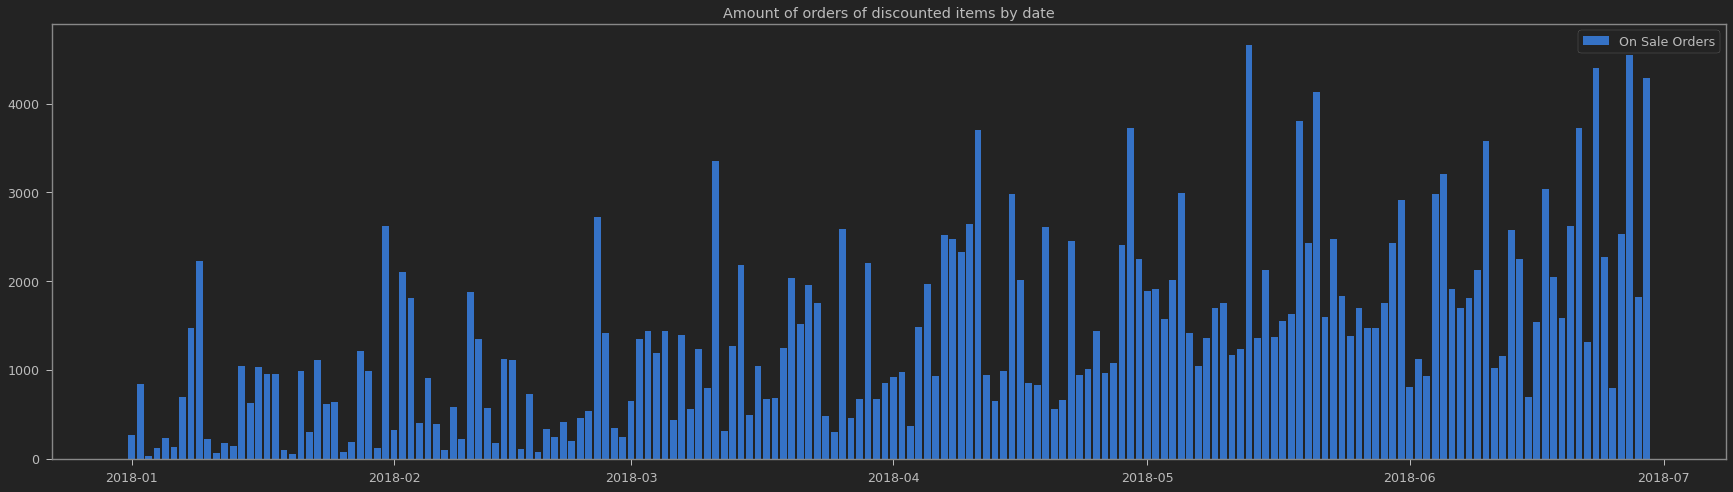

In [13]:
plt.bar(x_promo, y_promo, label="On Sale Orders")
plt.title('Amount of orders of discounted items by date')
plt.legend()

### Amount of orders of items not on sale by date

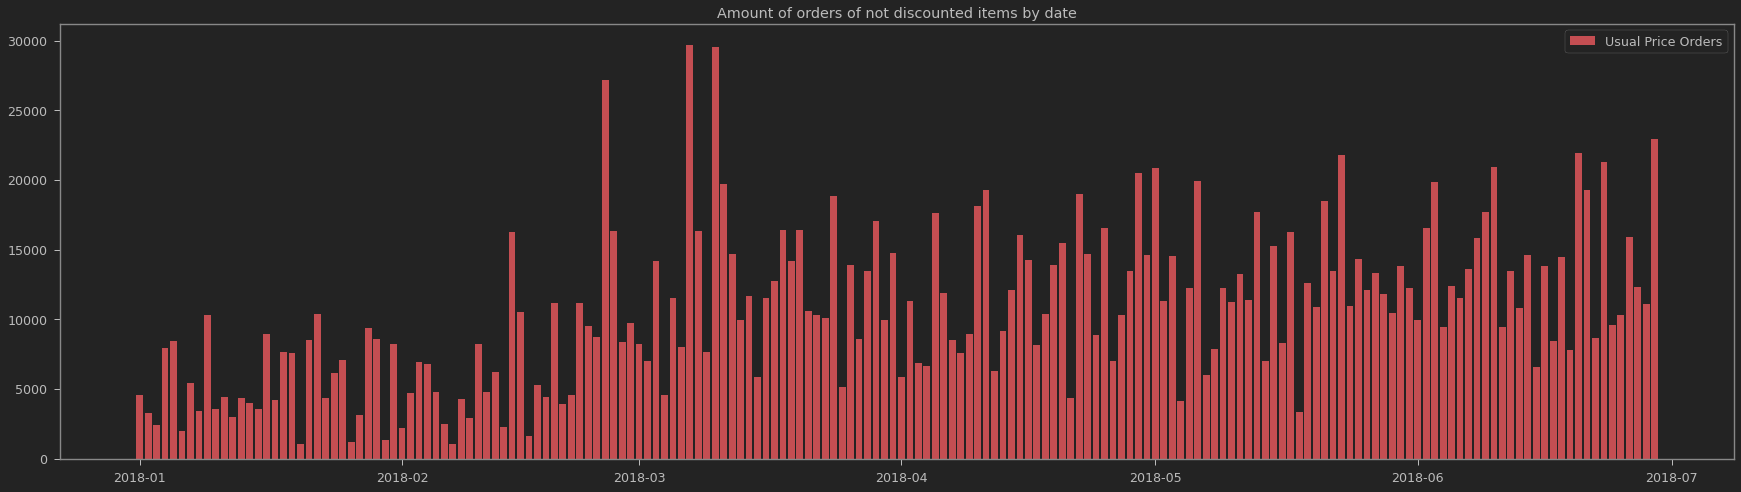

In [14]:
plt.bar(x_not_promo, y_not_promo, color='r', label="Usual Price Orders")
plt.title('Amount of orders of not discounted items by date')
plt.legend()

### Comparisson between the volume of orders of discounted and not discounted items

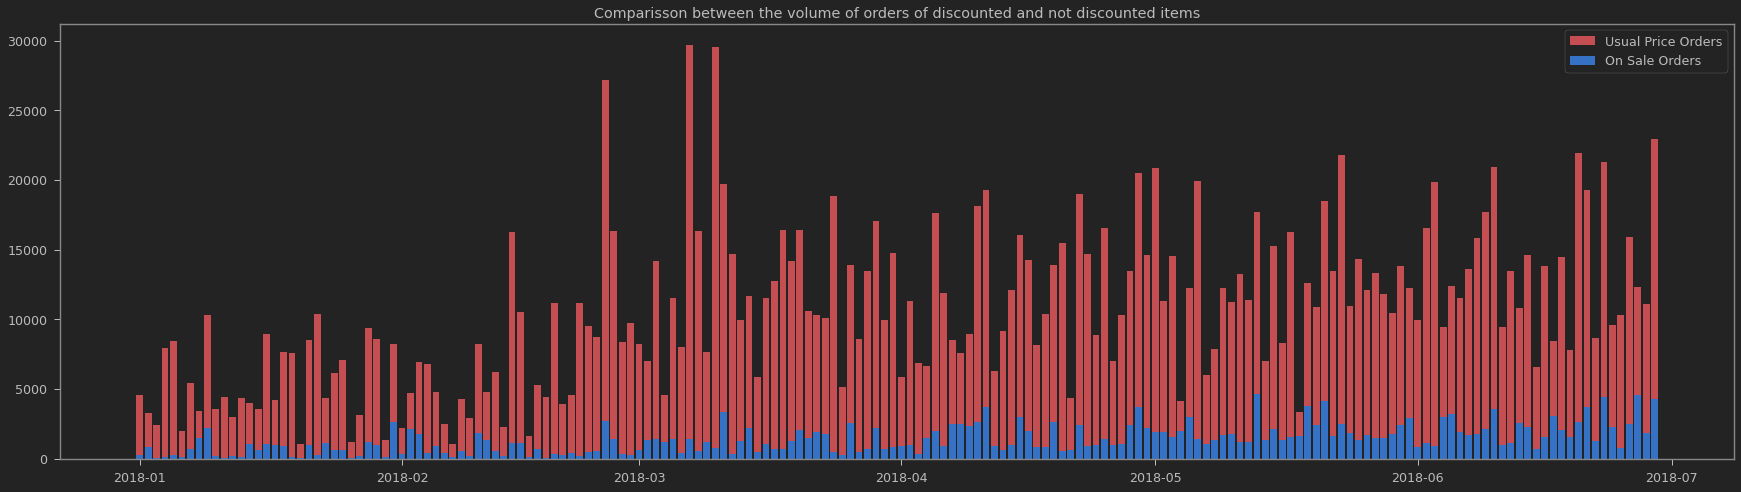

In [15]:

plt.bar(x_not_promo, y_not_promo, color='r', label='Usual Price Orders')
plt.bar(x_promo, y_promo, color='b', label='On Sale Orders')
plt.legend()
plt.title("Comparisson between the volume of orders of discounted and not discounted items")
plt.show()

### How much of the total volume of orders are represented by discounted items?

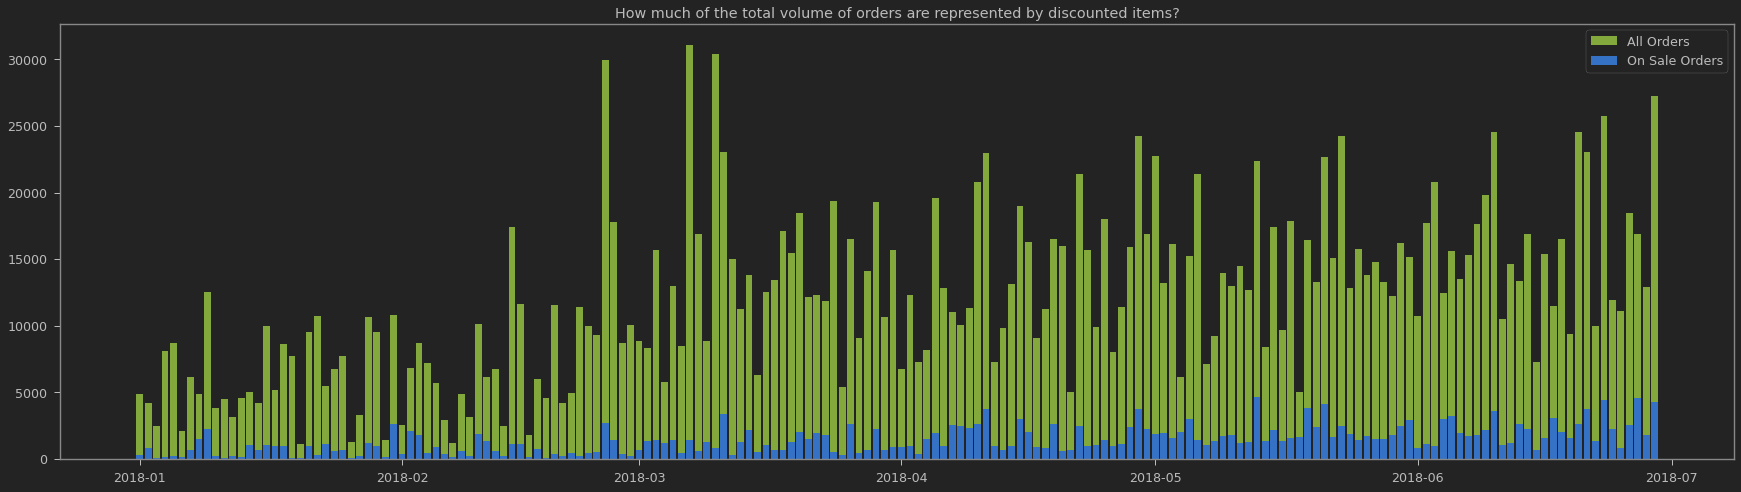

In [16]:
plt.bar(x_all, y_all, color='g', label="All Orders")
plt.bar(x_promo, y_promo, color='b', label="On Sale Orders")
plt.title("How much of the total volume of orders are represented by discounted items?")
plt.legend()
plt.show()

## Days with the biggest order volume

In [17]:
TOP_SIZE = 10

In [18]:
# Days with the biggest order volume
highest_volume = all_orders['time'].dt.date.value_counts()[:TOP_SIZE].sort_index()

# Days with the highest order volume of ITEMS ON SALE
discounts_highest_volume = orders_on_sale['time'].dt.date.value_counts()[:TOP_SIZE].sort_index()

# Days with the hightest order volume of ITEMS NOT ON SALE
not_discounts_highest_volume = orders_not_on_sale['time'].dt.date.value_counts()[:TOP_SIZE].sort_index()
print(highest_volume, discounts_highest_volume, not_discounts_highest_volume)

2018-02-25    29925
2018-03-07    31112
2018-03-10    30376
2018-03-11    23060
2018-04-29    24269
2018-05-23    24256
2018-06-10    24551
2018-06-20    24535
2018-06-23    25736
2018-06-29    27245
Name: time, dtype: int64 2018-04-11    3704
2018-04-29    3731
2018-05-13    4665
2018-05-19    3802
2018-05-21    4136
2018-06-10    3579
2018-06-21    3727
2018-06-23    4405
2018-06-27    4544
2018-06-29    4293
Name: time, dtype: int64 2018-02-25    27207
2018-03-07    29717
2018-03-10    29577
2018-04-29    20538
2018-05-01    20890
2018-05-23    21785
2018-06-10    20972
2018-06-20    21908
2018-06-23    21331
2018-06-29    22952
Name: time, dtype: int64
